In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os


In [4]:
os.getcwd()

'c:\\Users\\sanha\\GFN_to_ARC\\gfn\\src'

In [18]:
df = pd.read_csv('wandb_export_2024-05-09T17_40_51.516+09_00.csv')
df.head()


,Step,(EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy,(EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy__MIN,(EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy__MAX
0,3,0.958333,0.958333,0.958333
1,8,0.965278,0.965278,0.965278
2,13,0.958333,0.958333,0.958333
3,18,0.937500,0.937500,0.937500
4,23,0.944444,0.944444,0.944444


In [22]:
print(len(df["(EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy"]))

50000


In [30]:
# moving average
df["MA"] = df["(EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy"].rolling(window=1000).mean()

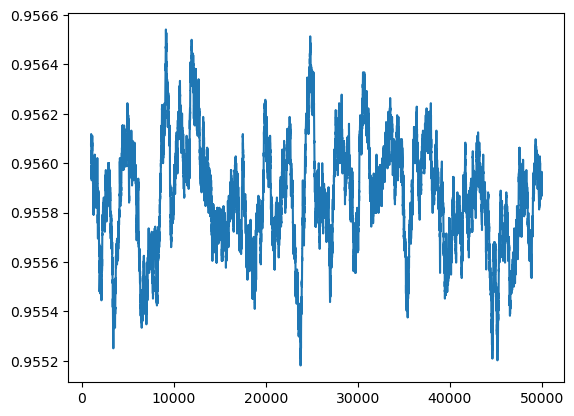

<Figure size 640x480 with 0 Axes>

In [31]:
# MA plot
plt.plot(df["MA"])
plt.show()
plt.savefig("MA_plot.png")


In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

In [43]:
# Define custom color map
cvals  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ["#000000", "#0074D9", "#FF4136", "#2ECC40", "#FFDC00", "#AAAAAA", "#F012BE", "#FF851B", "#7FDBFF", "#870C25"]  # [Black, Blue, Red, Green, Yellow, Gray, Pink, Orange, Light blue, Brown]
norm = plt.Normalize(min(cvals), max(cvals))
tuples = list(zip(map(norm, cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

def trajectory_to_string(traj):
    """trajectory를 문자열로 변환하여 비교 가능하게 만듭니다."""
    return str(traj)  # 각 state 자체를 문자열로 변환

def find_unique_trajectories(trajectories, rewards):
    """유니크한 trajectory를 찾아 set으로 관리한 후, dict로 변환하여 각 trajectory와 해당 reward를 반환합니다."""
    print(f"Total trajectories: {len(trajectories)}")
    unique_trajectory_set = set(trajectory_to_string(traj) for traj in trajectories)
    unique_trajectories = []
    
    for unique_traj_str in unique_trajectory_set:
        for traj, reward in zip(trajectories, rewards):
            if trajectory_to_string(traj) == unique_traj_str:
                unique_trajectories.append({'trajectory': traj, 'reward': reward})
                break  # 같은 trajectory가 여러 번 등장할 필요가 없으므로 첫 번째 매칭에서 탈출
    
    return unique_trajectories

def visualize_trajectory(fig, traj, title):
    """가변 길이의 trajectory (이미지 시퀀스)를 시각화합니다."""
    num_frames = len(traj)
    num_cols = min(5, num_frames)
    num_rows = (num_frames - 1) // num_cols + 1
    
    for i, state in enumerate(traj):
        ax = fig.add_subplot(num_rows, num_cols, i + 1)
        state = np.array(state).squeeze()  # (1, 3, 3)에서 첫 번째 차원 제거 -> (3, 3)
        if state.ndim != 3 :
            state = state[:3, :3]
        ax.imshow(state, cmap=cmap)
        ax.axis('off')
        ax.set_title(f'Frame {i+1}')
    
    fig.suptitle(title)
    plt.tight_layout()

def load_and_visualize_unique(filename='data.json', max_display=10):
    # Load data from JSON file
    with open(filename, 'r') as f:
        data = json.load(f)

    trajectories = data['trajectories']
    rewards = data['rewards']

    # Find unique trajectories
    unique_traj_rewards = find_unique_trajectories(trajectories, rewards)
    
    num_unique = len(unique_traj_rewards)

    for i, traj_reward in enumerate(unique_traj_rewards):
        if i >= max_display:
            break
        
        traj = traj_reward['trajectory']
        reward = traj_reward['reward']

        fig = plt.figure(figsize=(15, 5))
        visualize_trajectory(fig, traj, f'Trajectory {i+1} (Reward: {reward:.2f})')
        plt.show()

    print(f"Total unique trajectories visualized: {num_unique}")

Total trajectories: 100


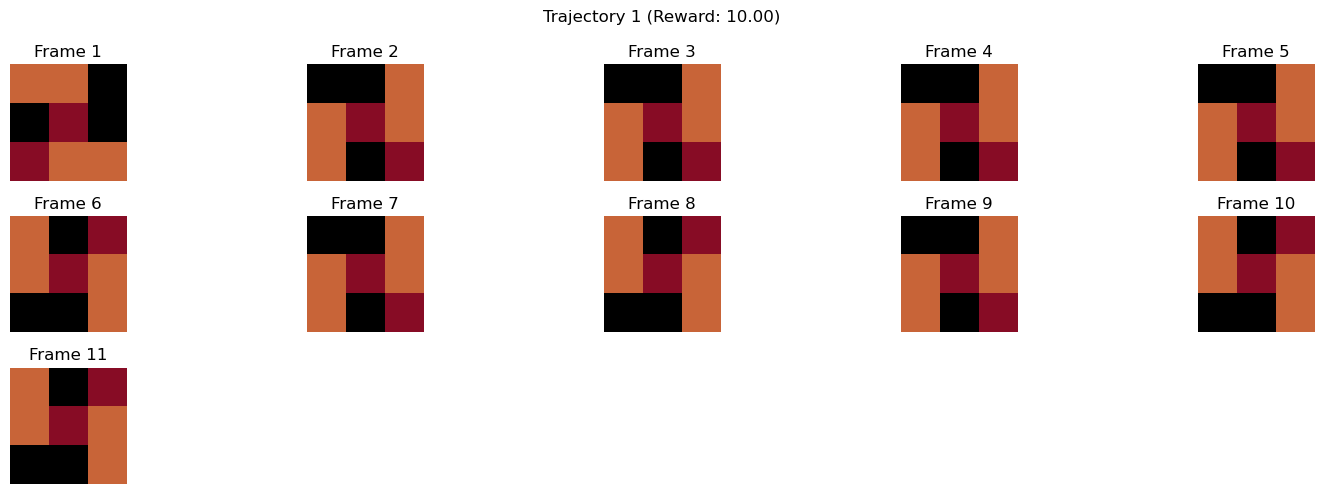

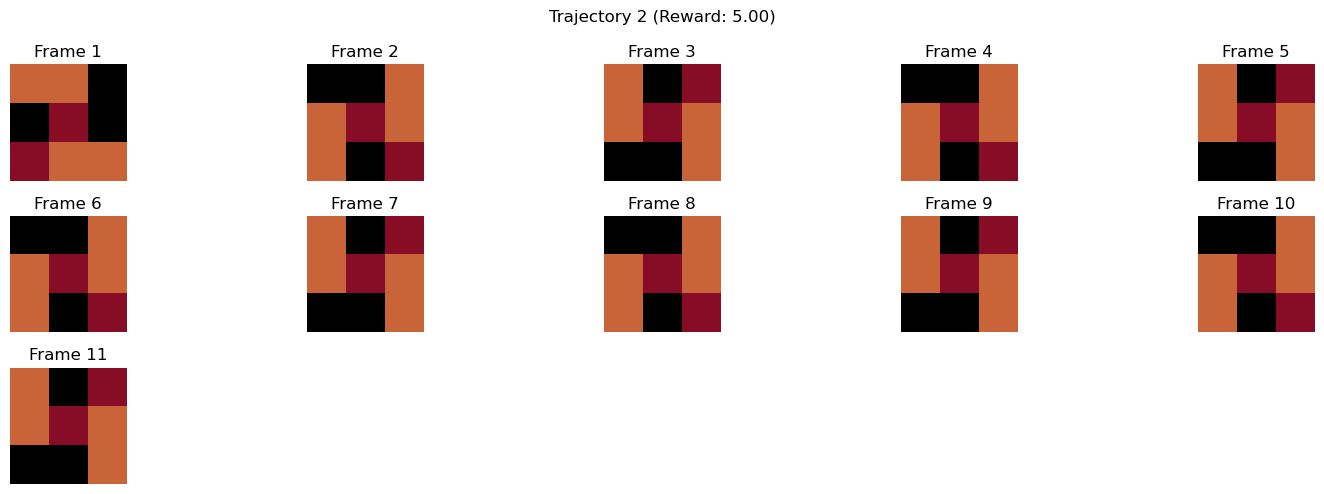

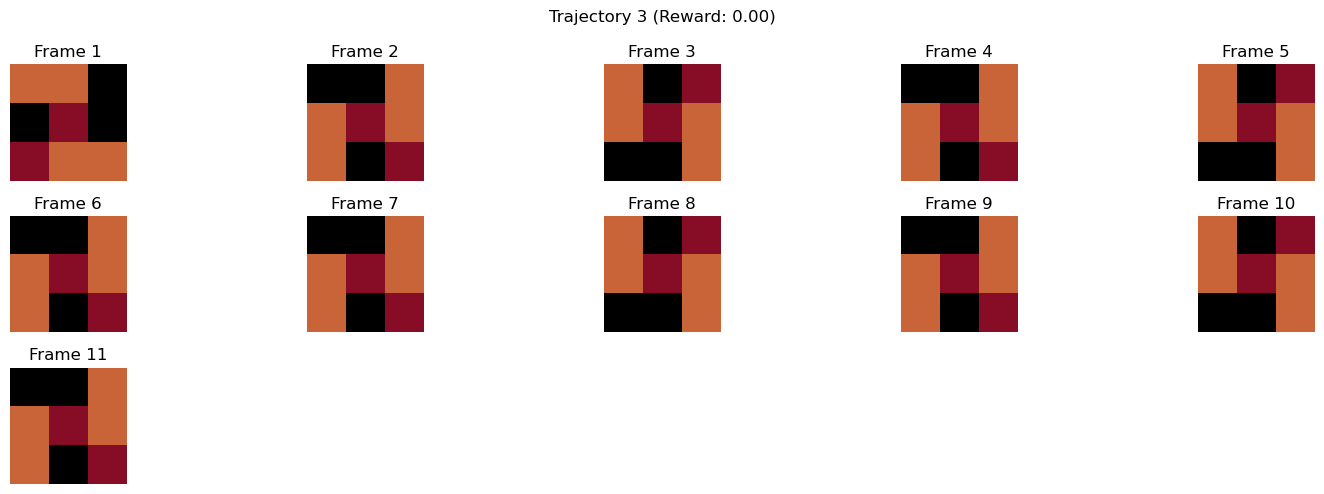

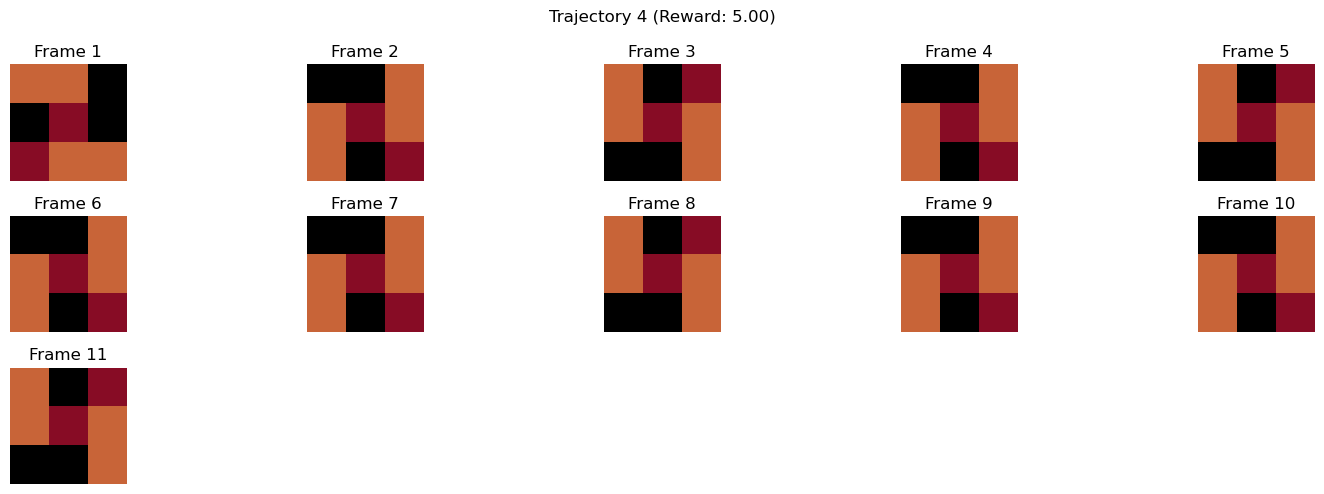

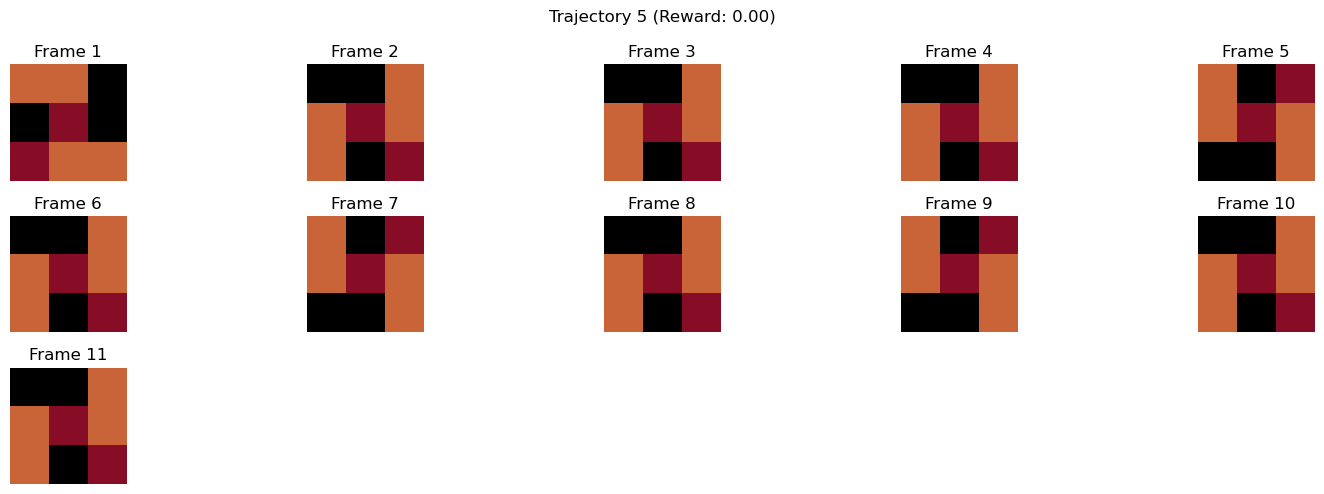

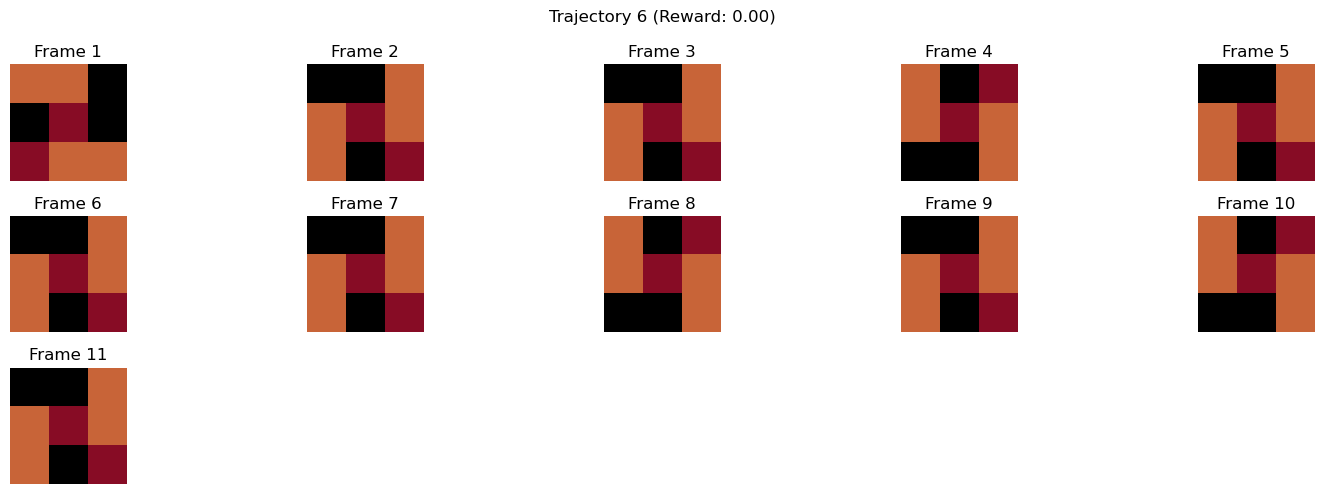

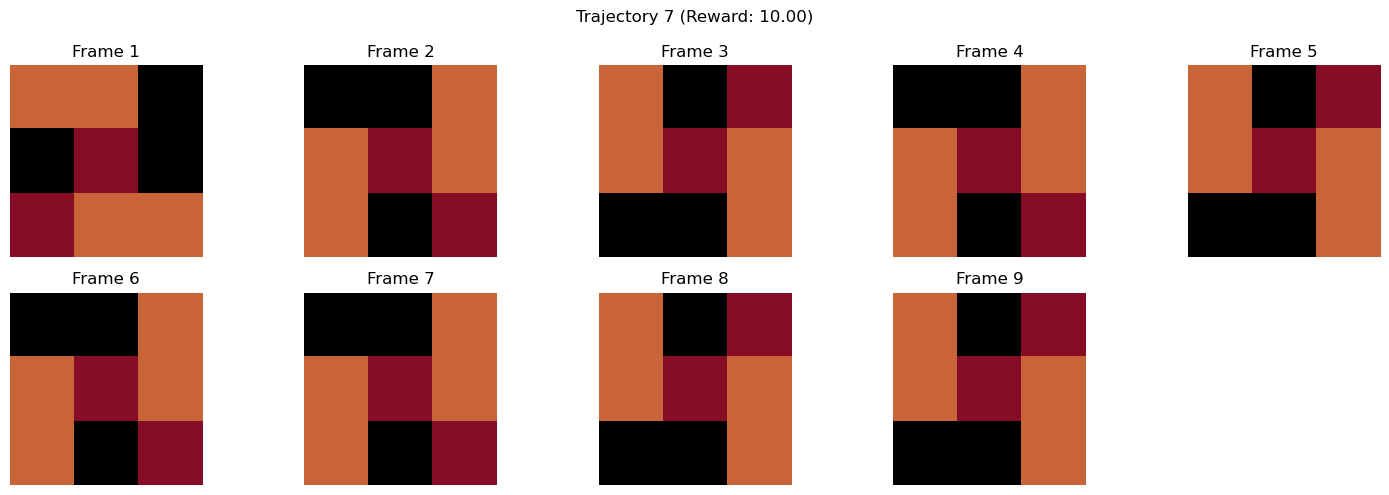

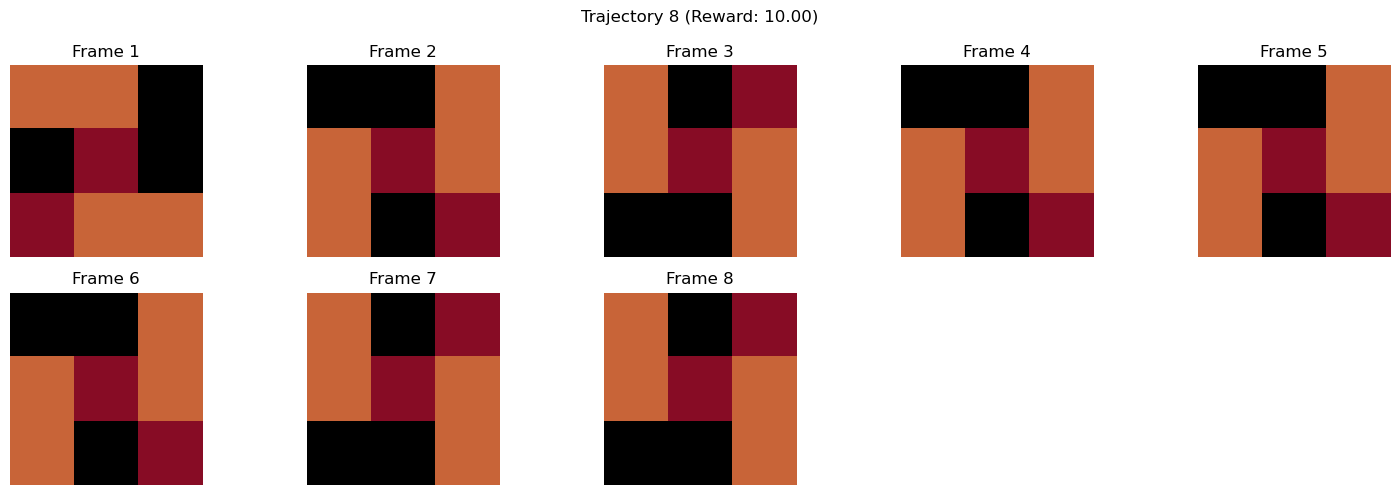

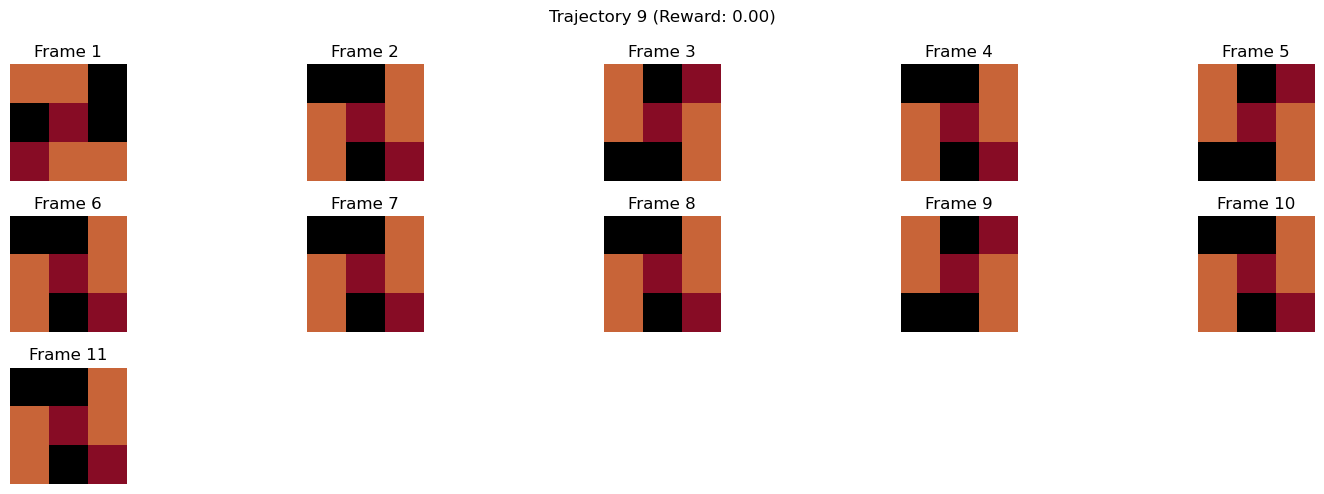

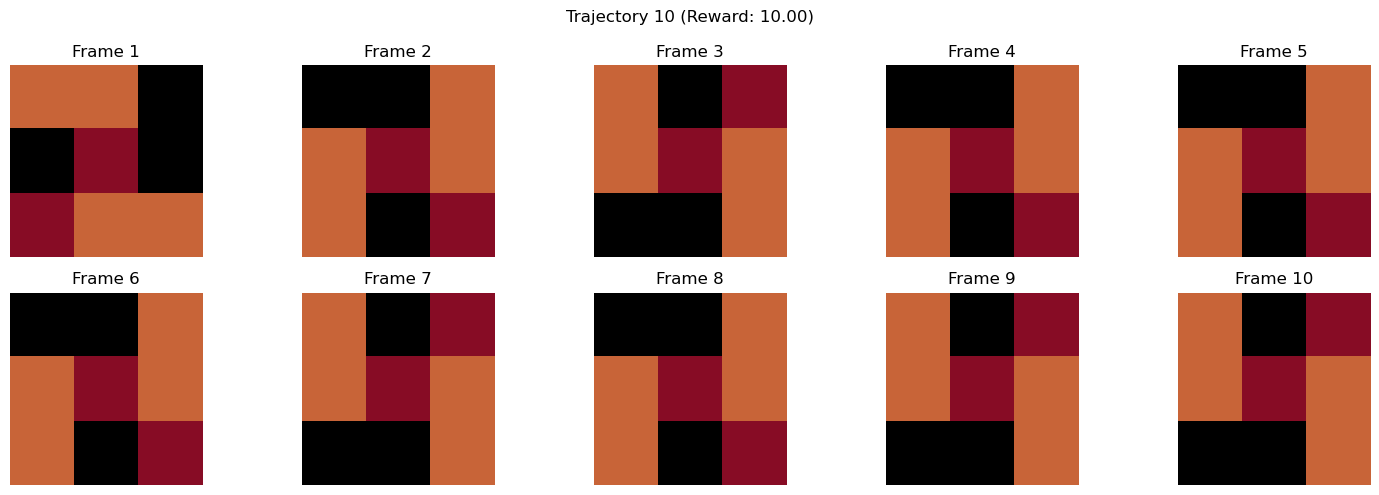

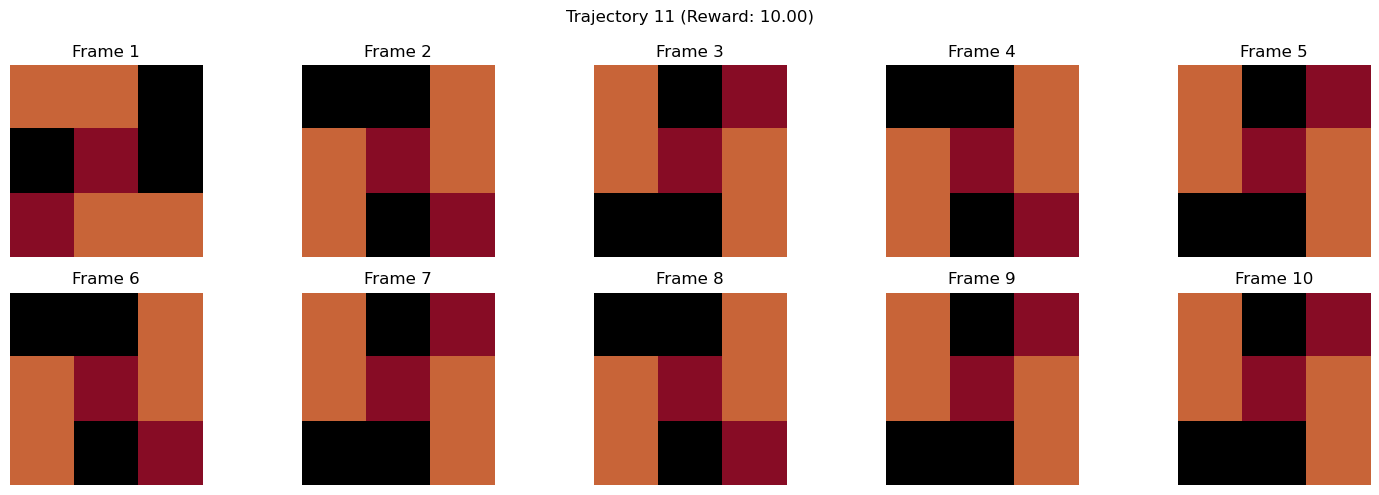

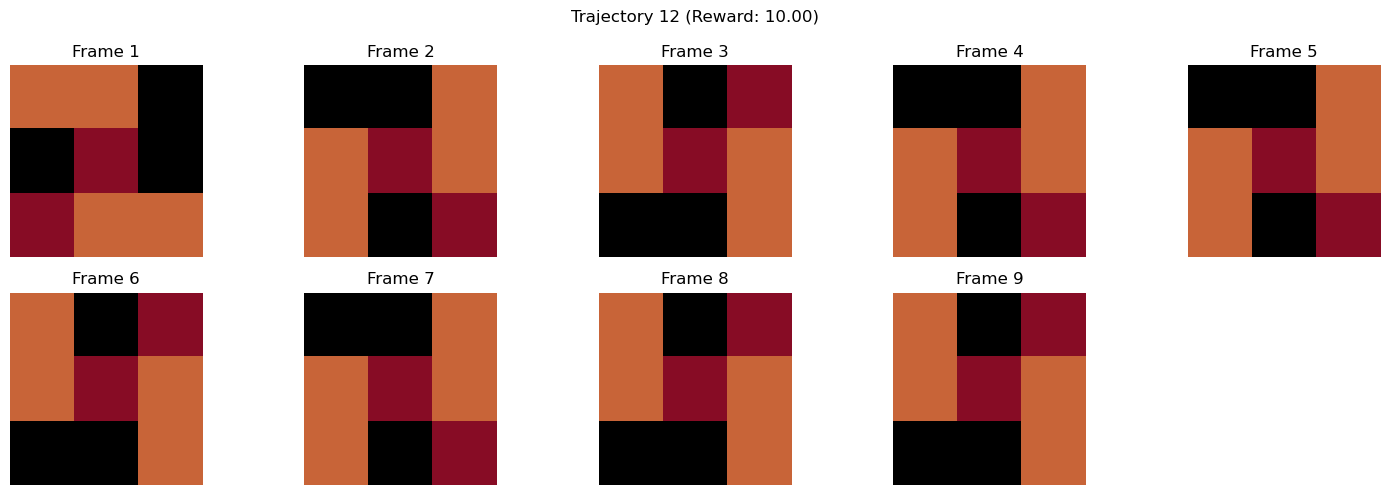

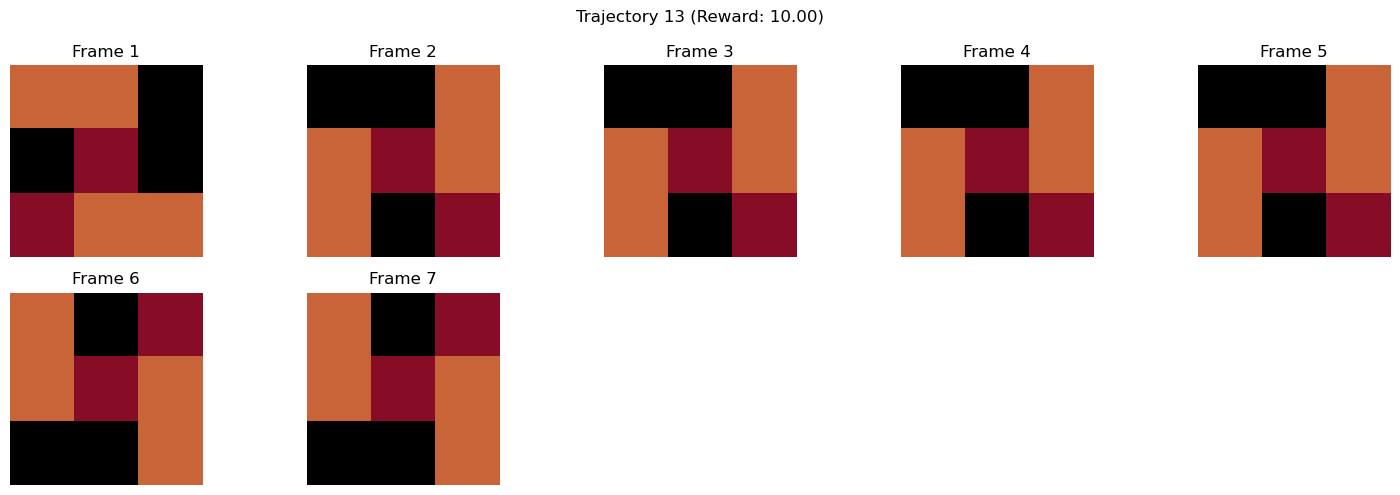

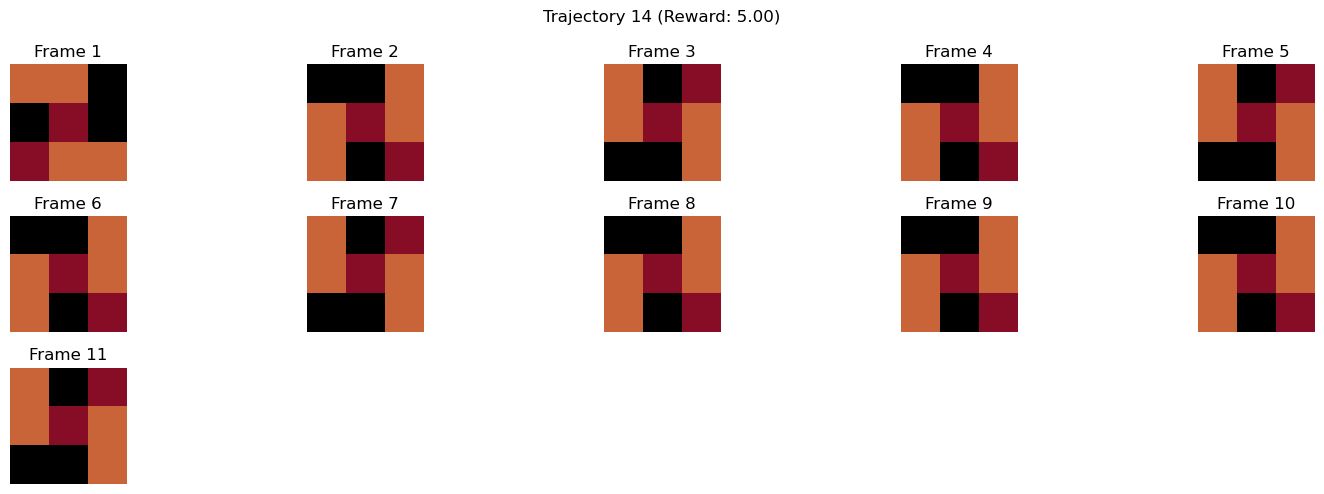

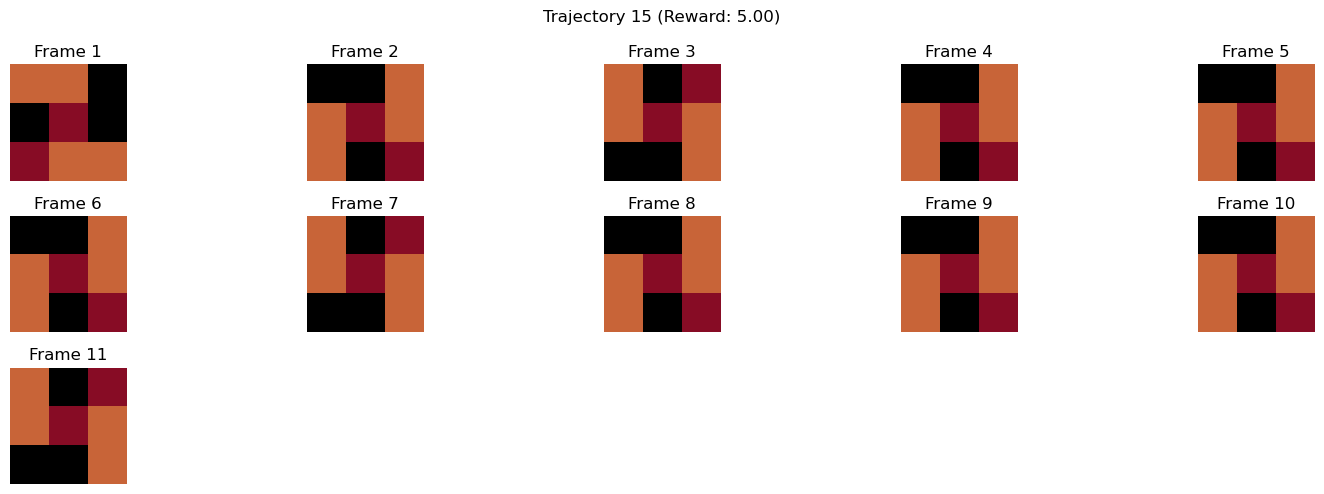

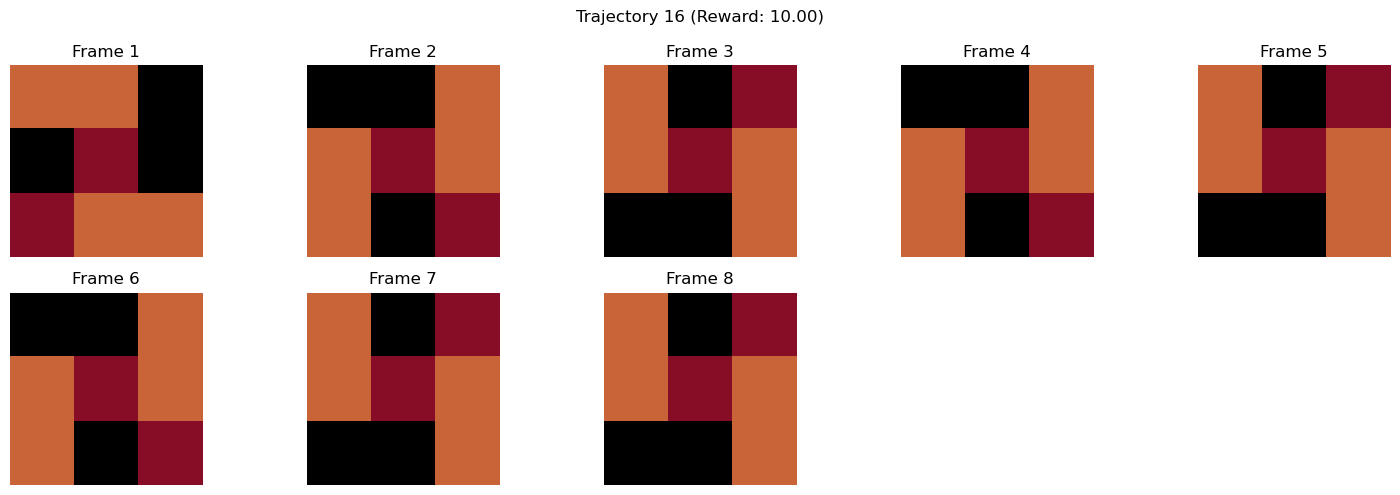

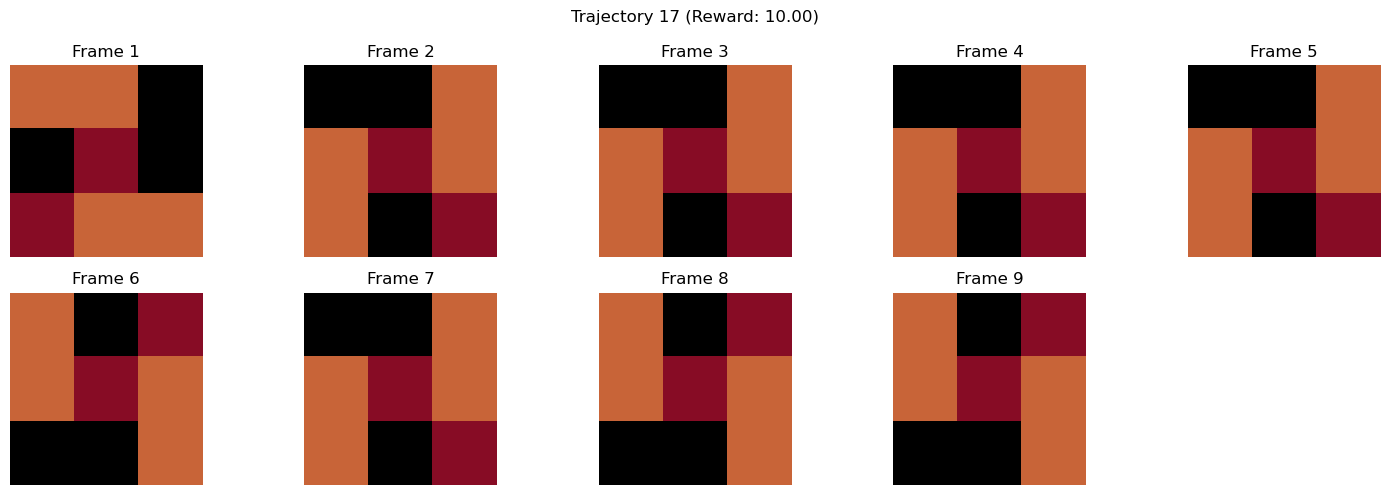

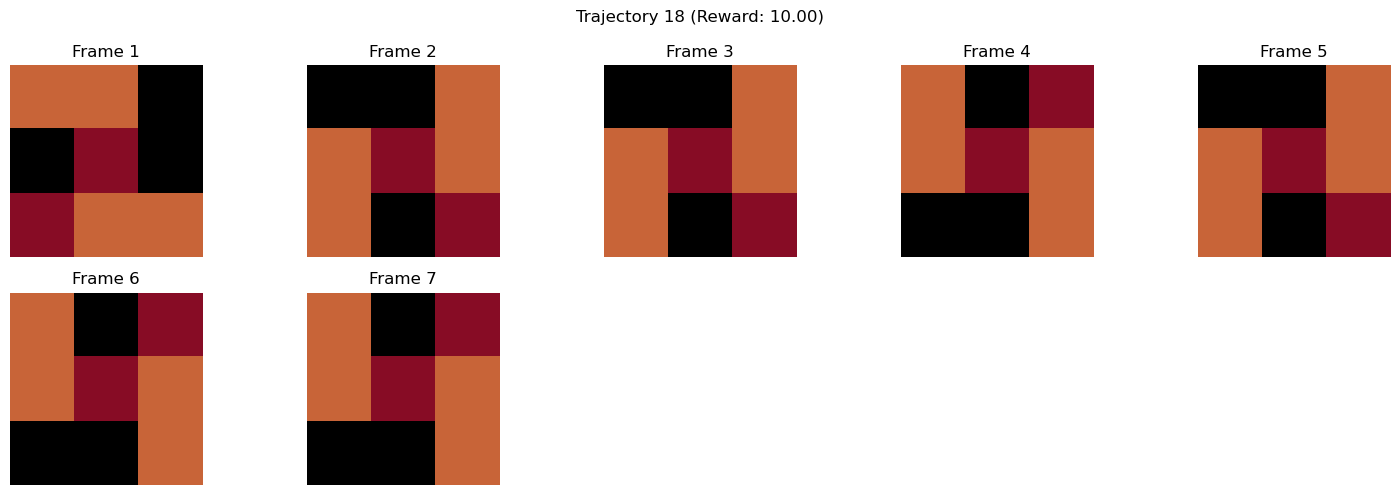

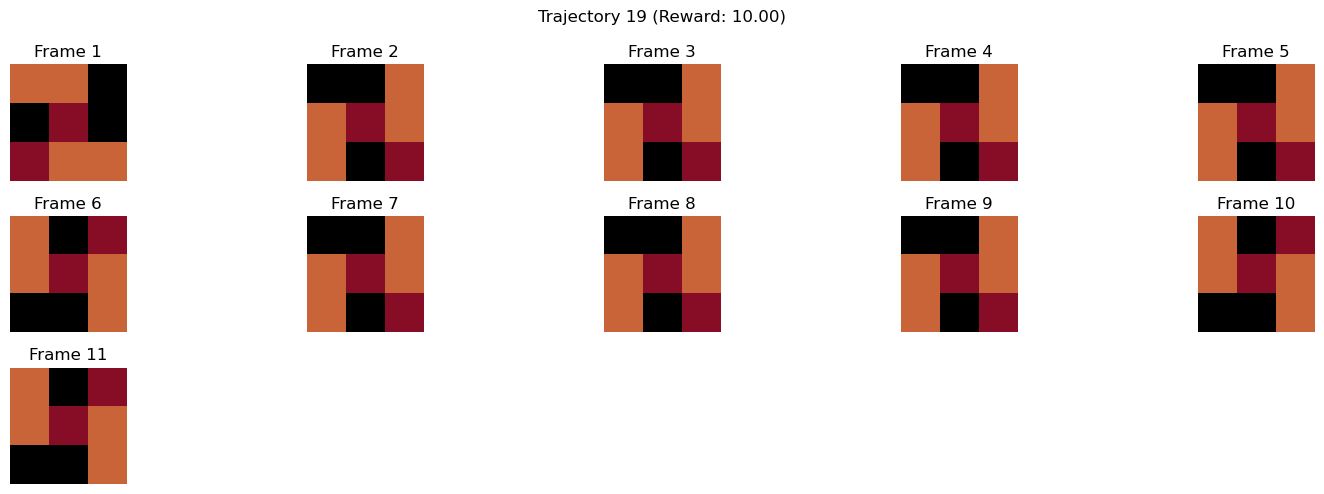

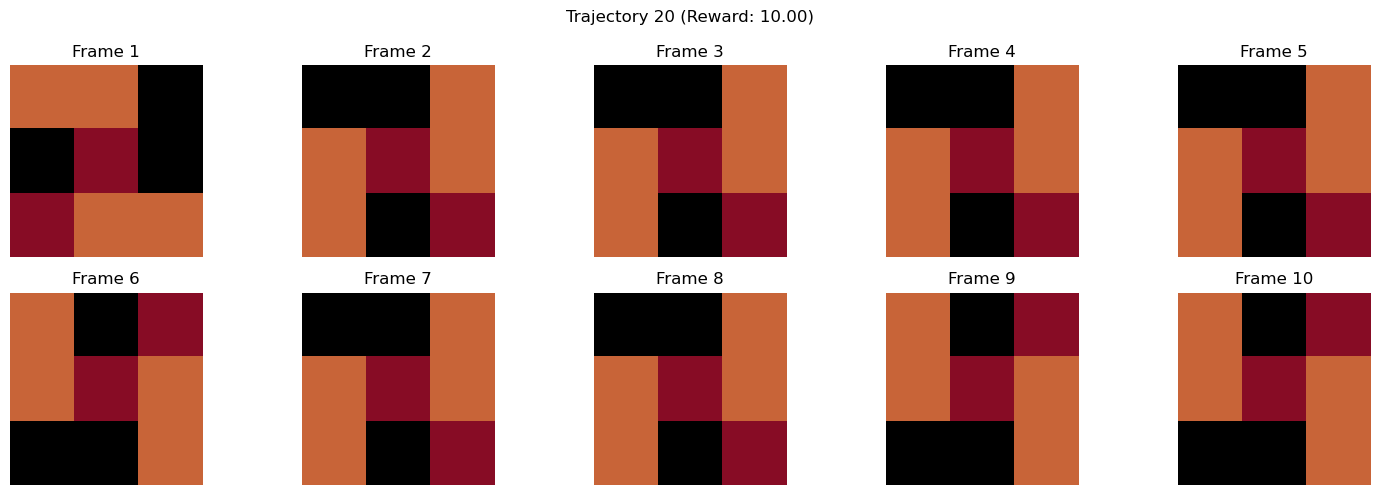

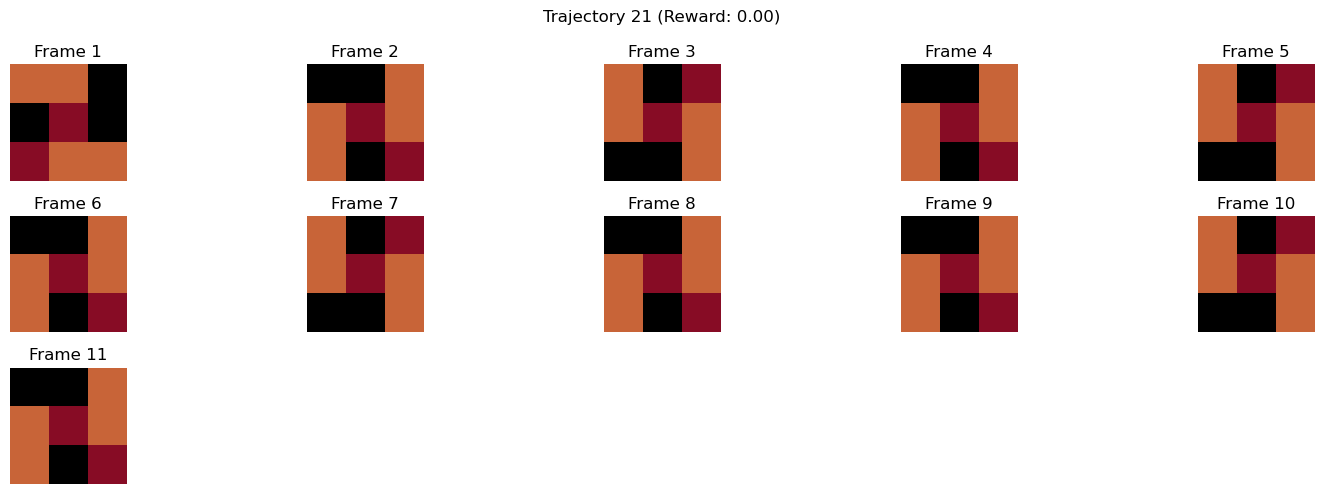

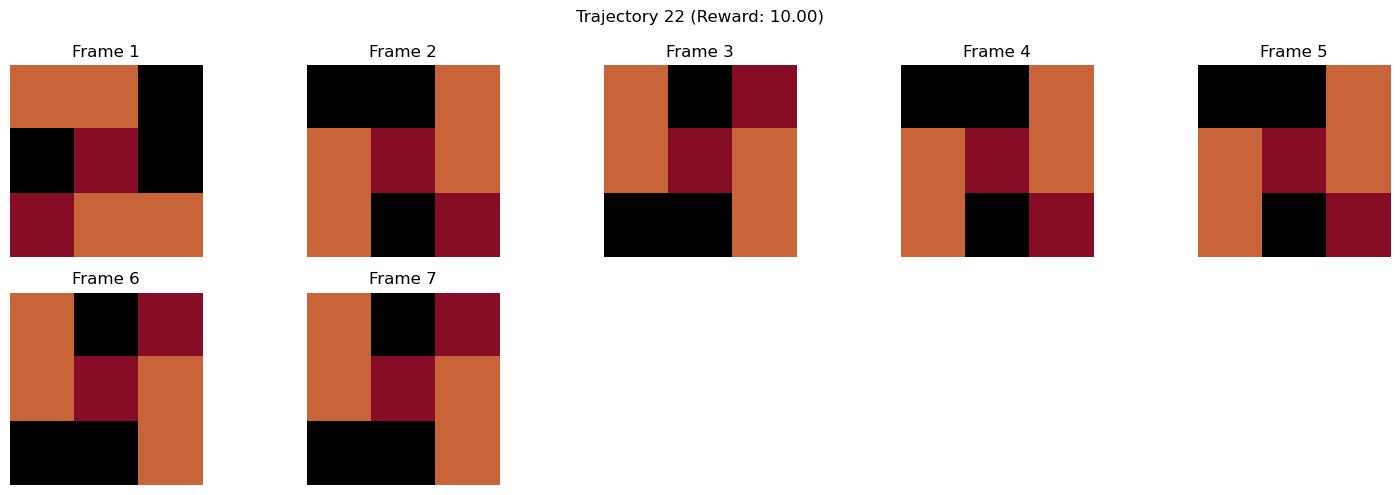

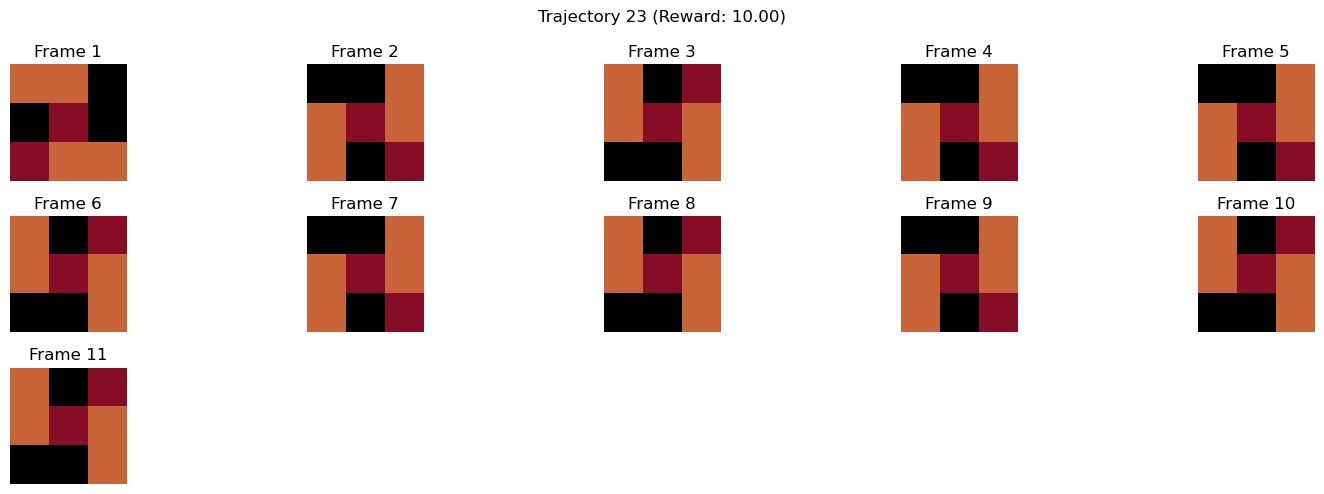

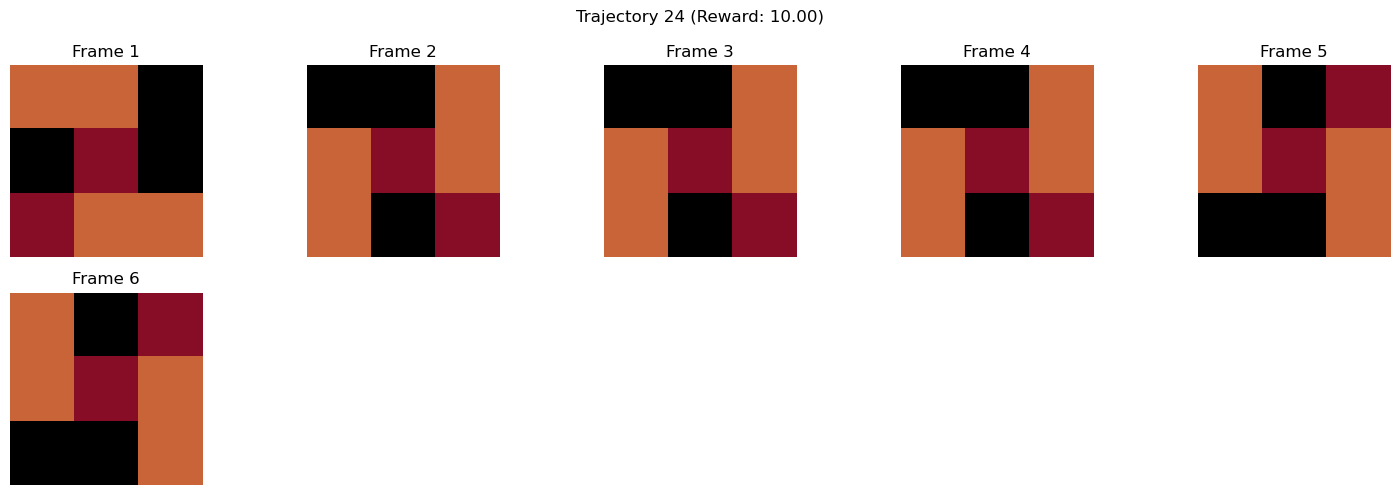

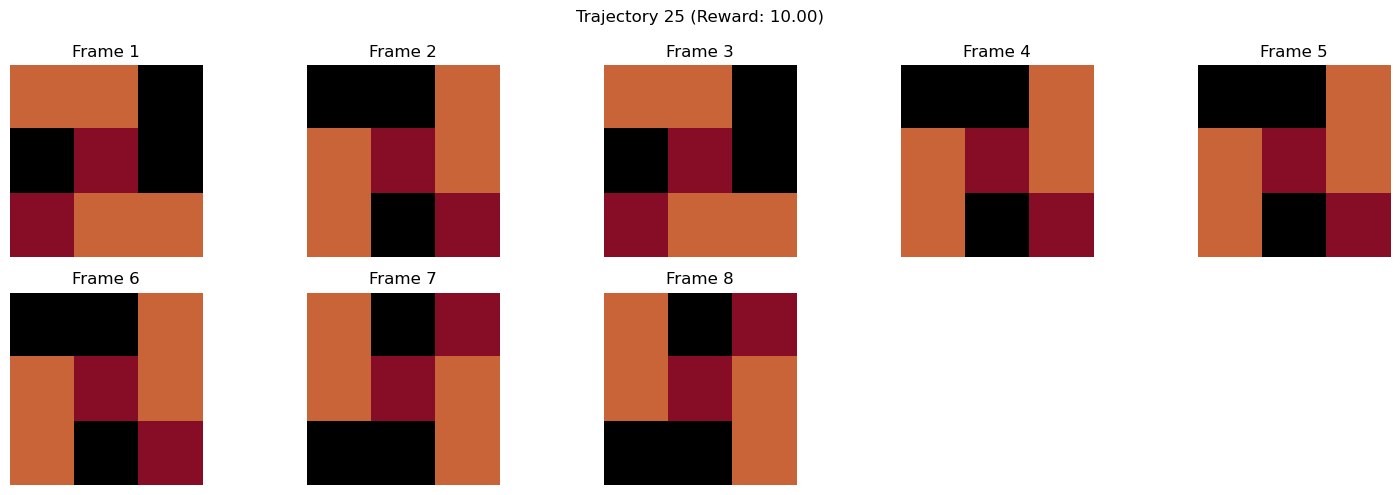

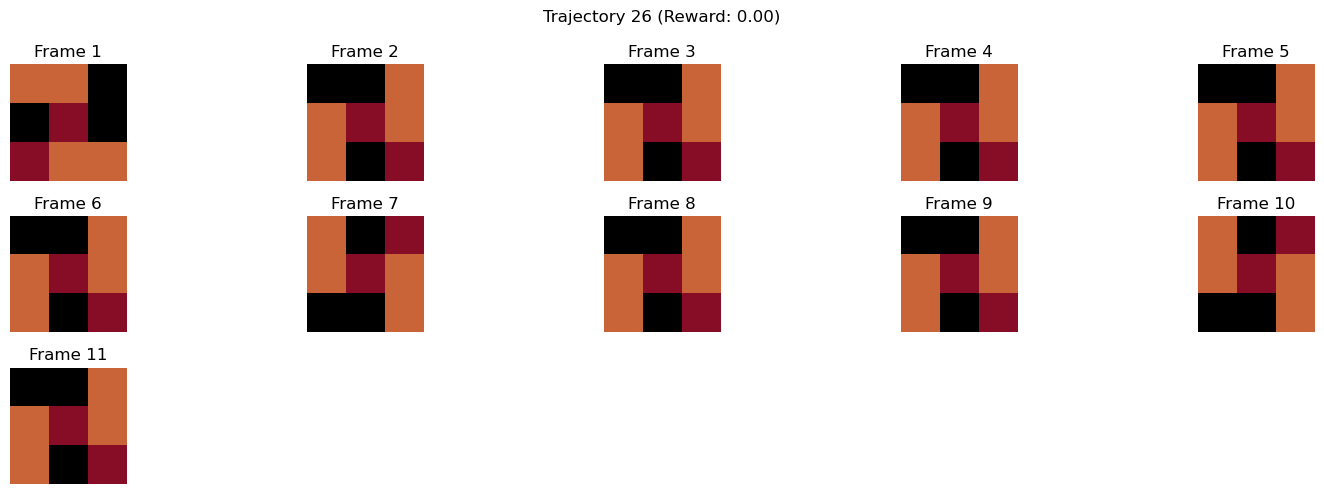

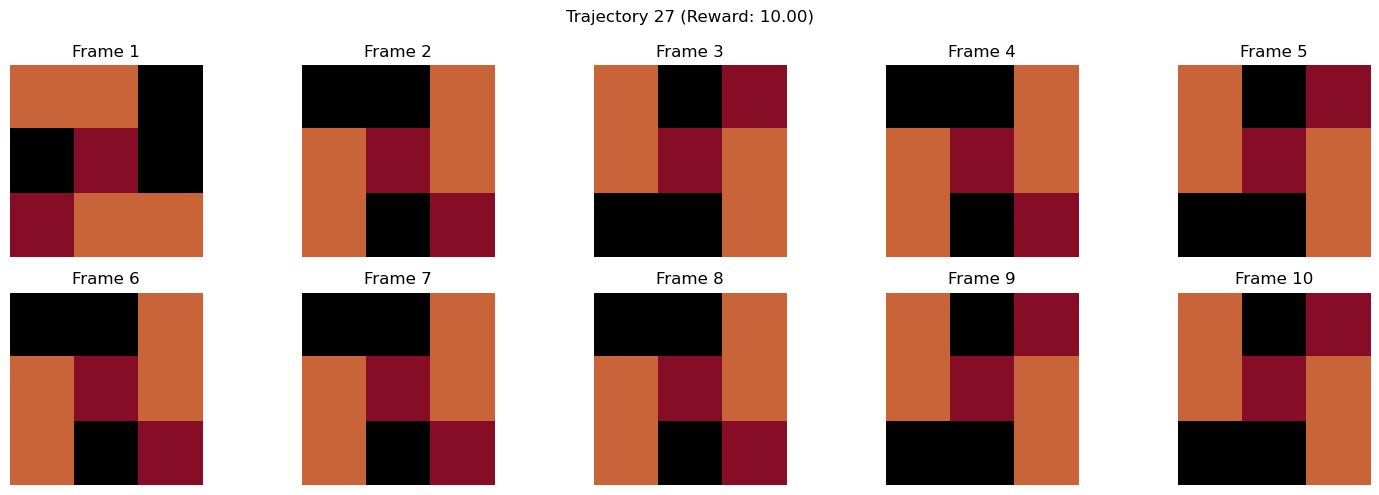

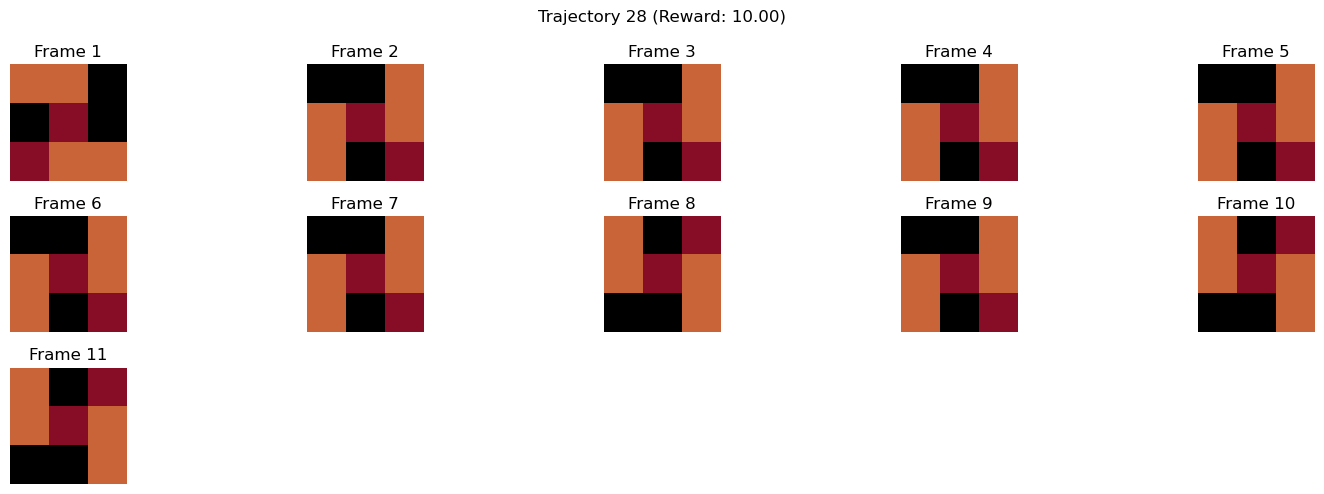

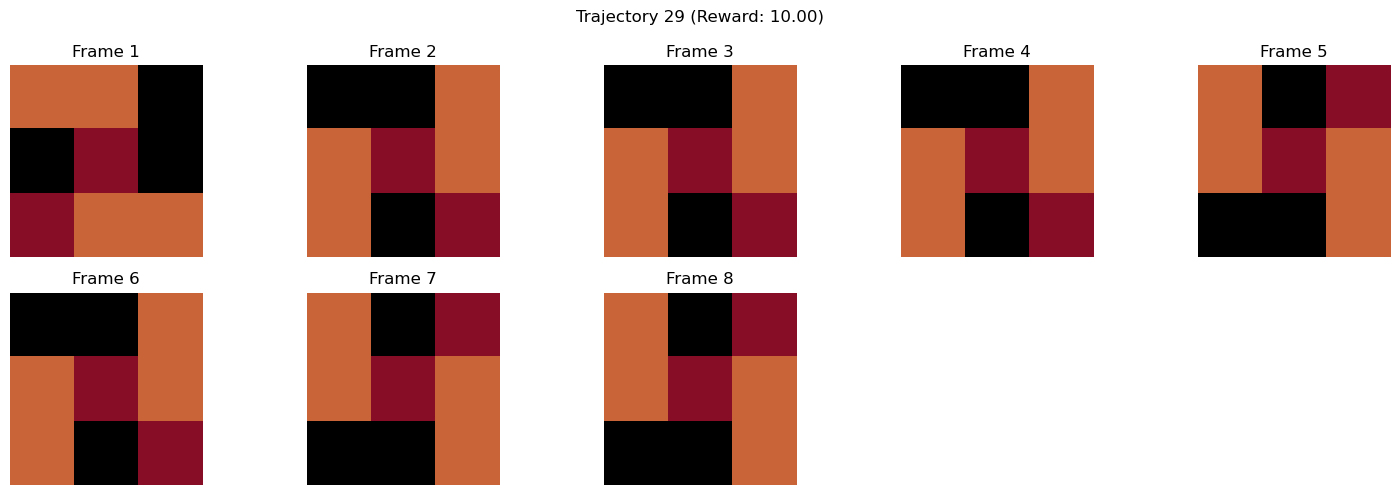

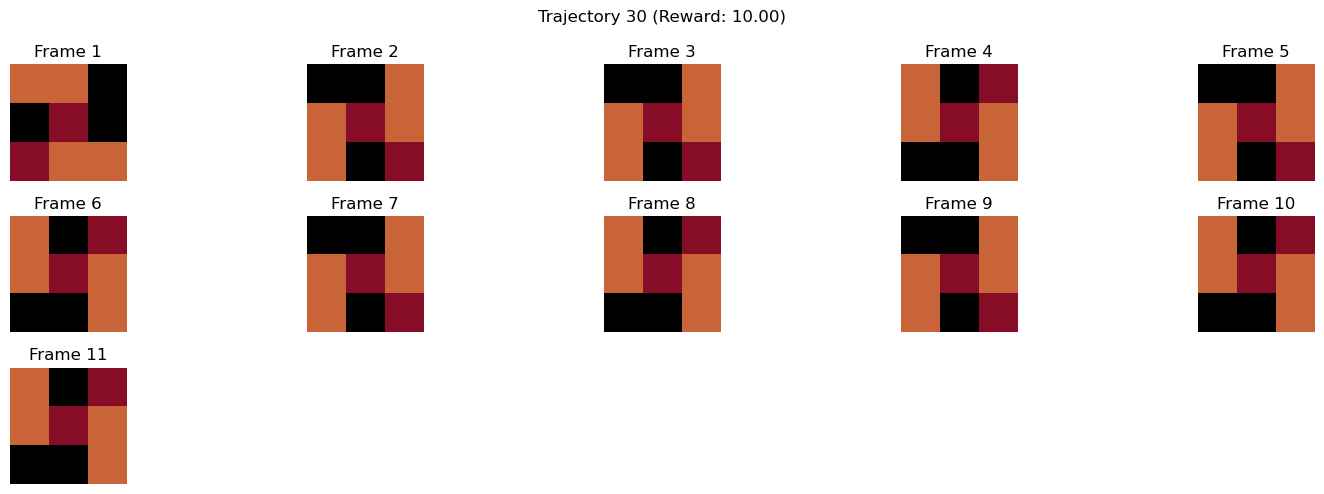

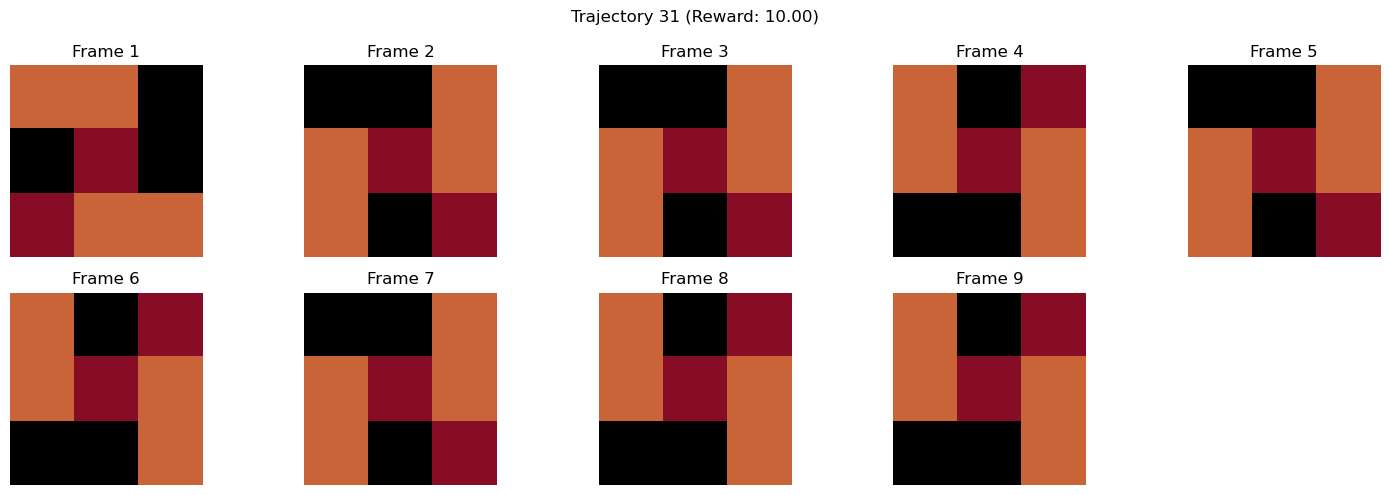

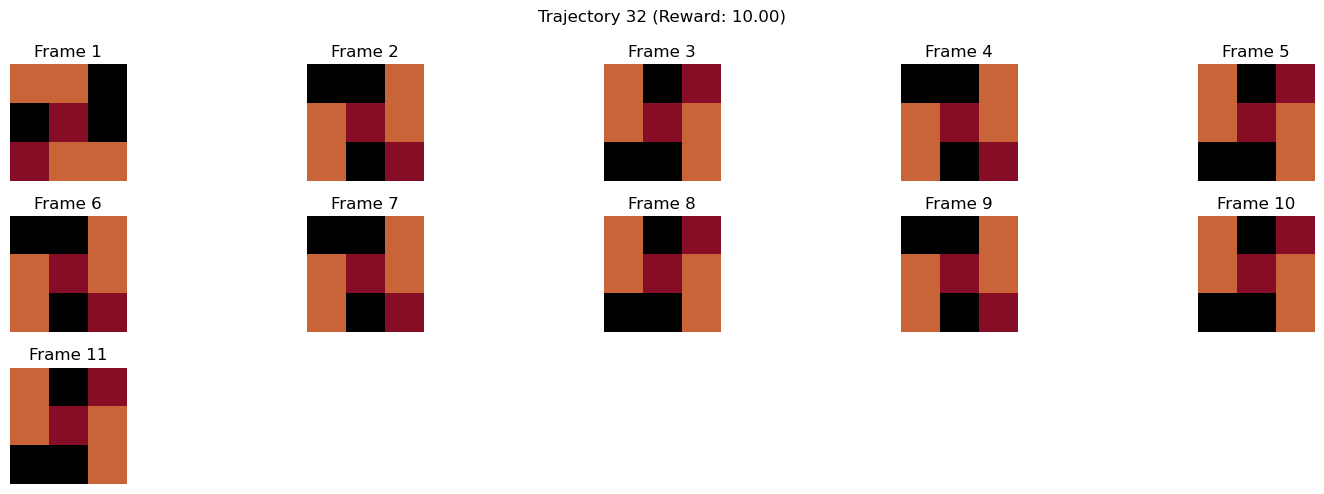

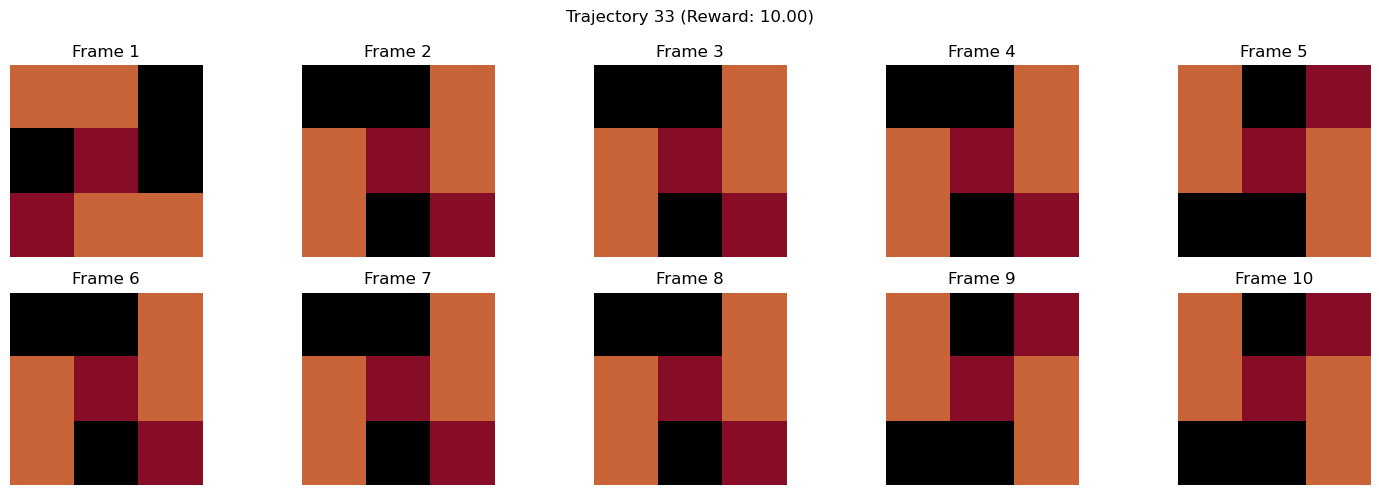

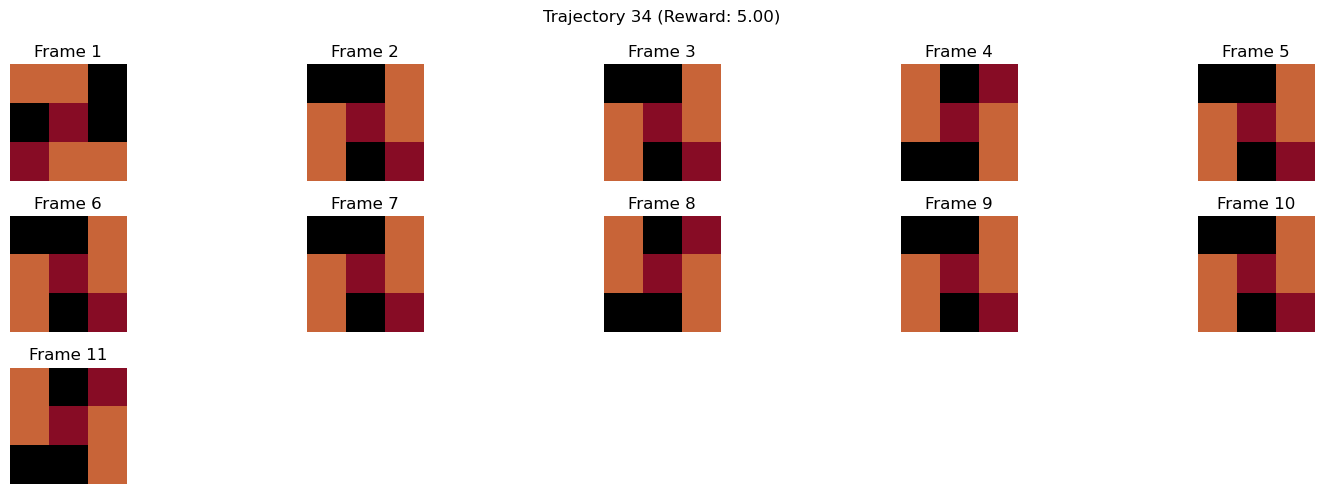

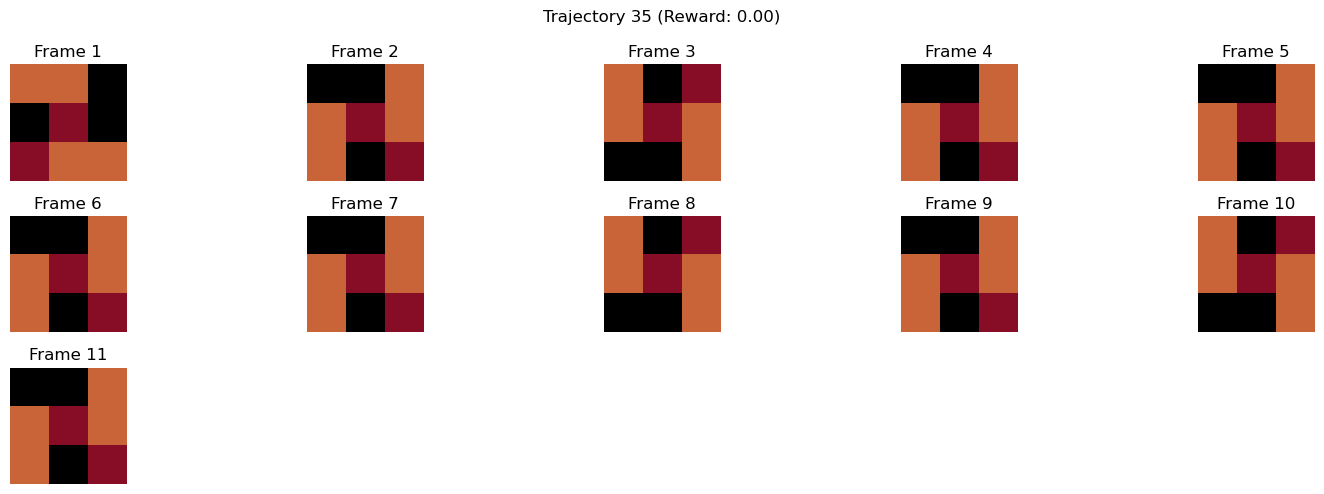

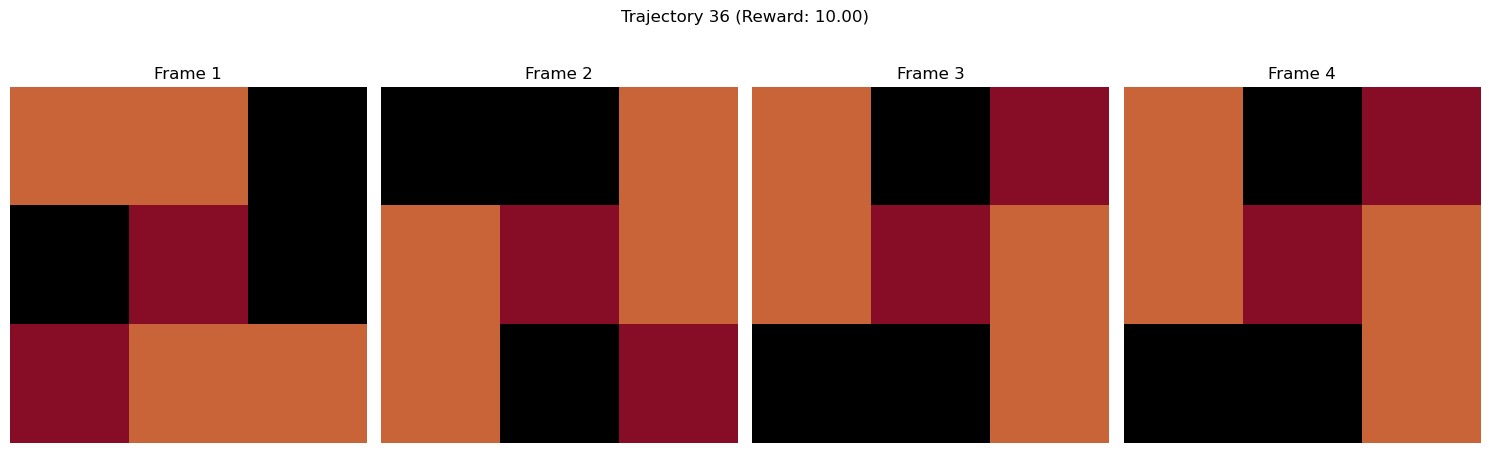

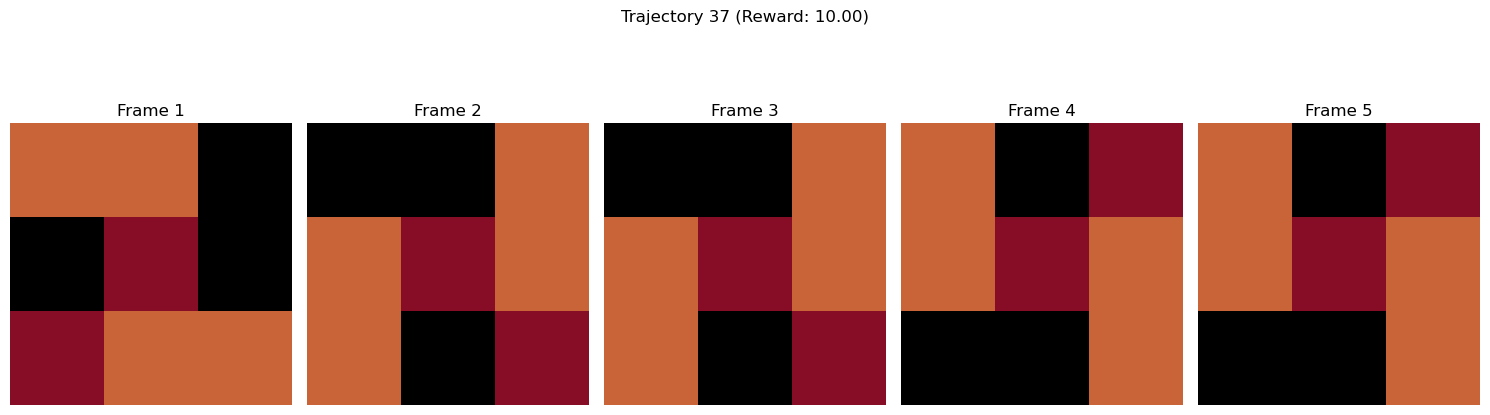

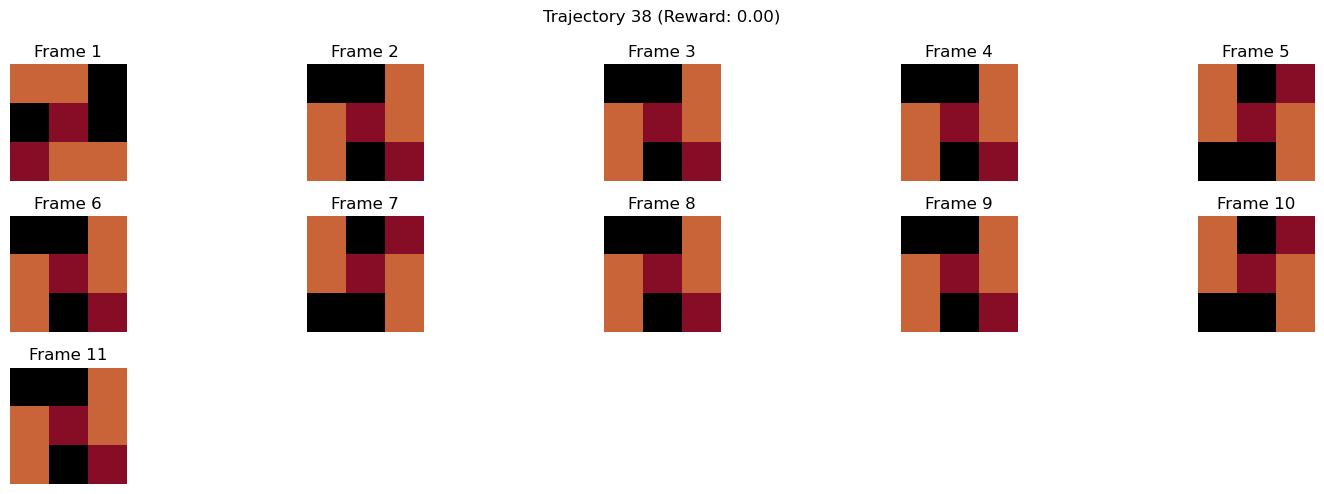

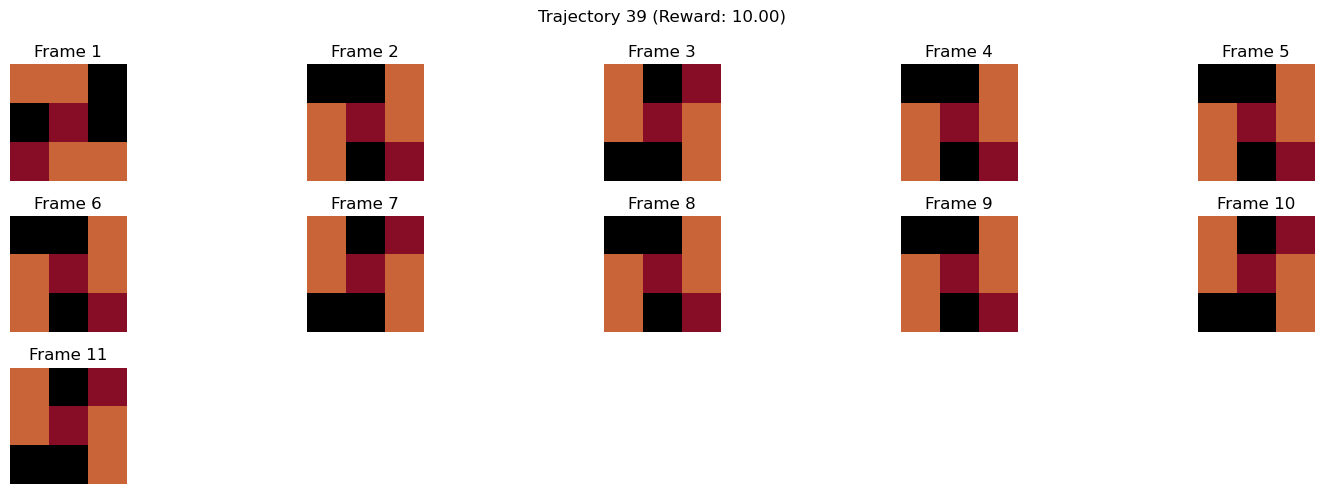

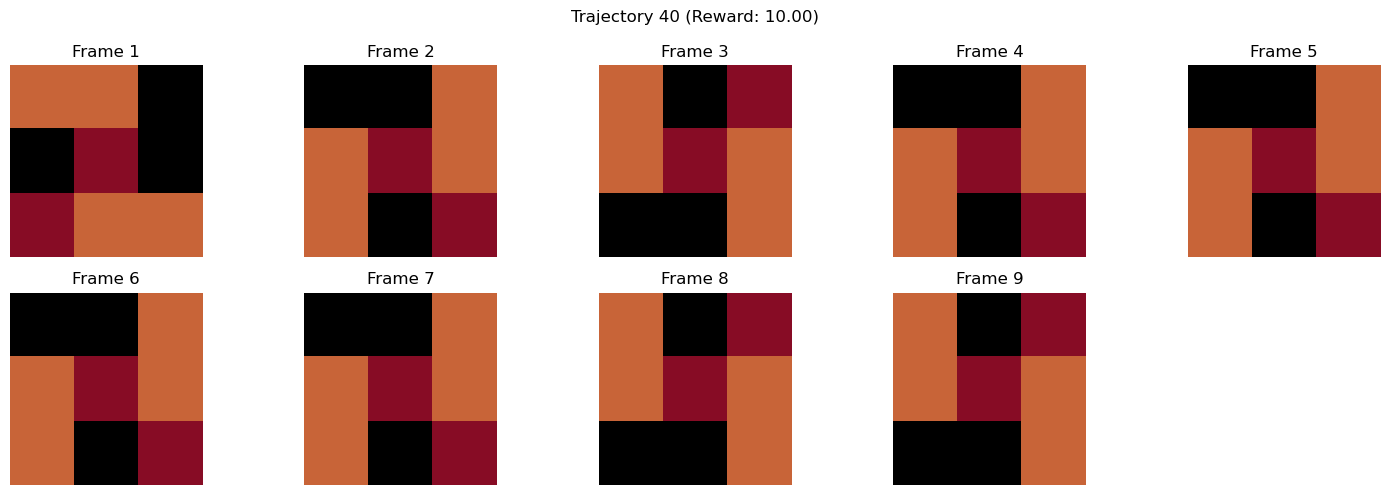

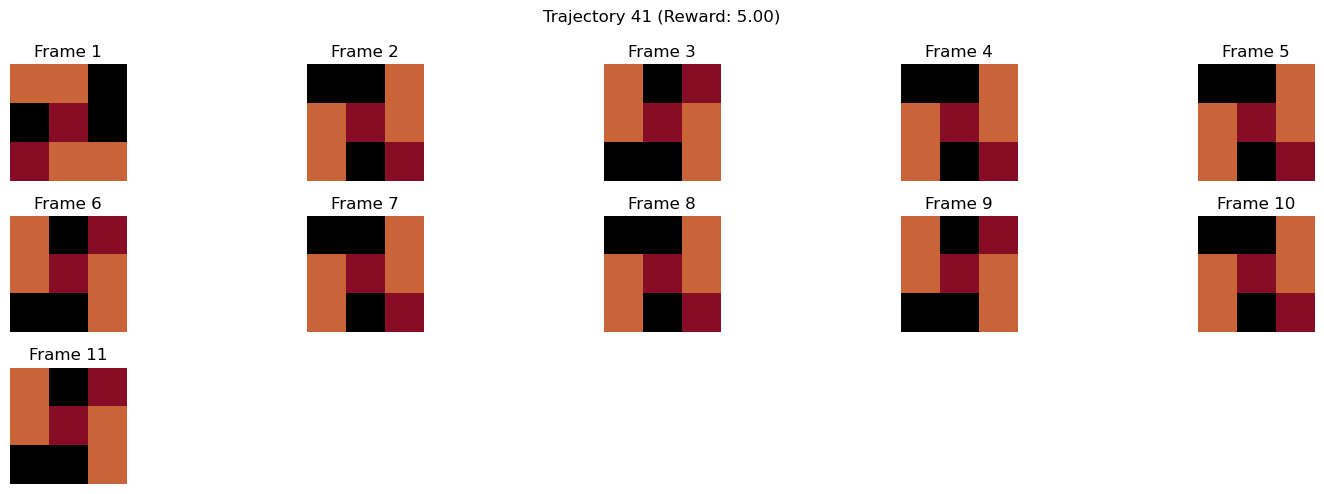

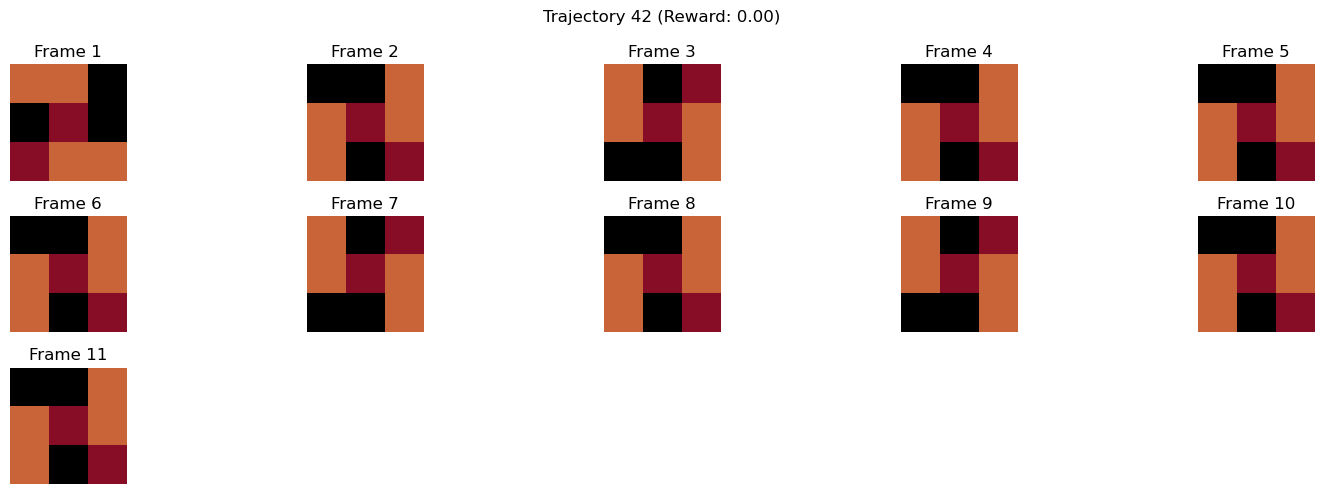

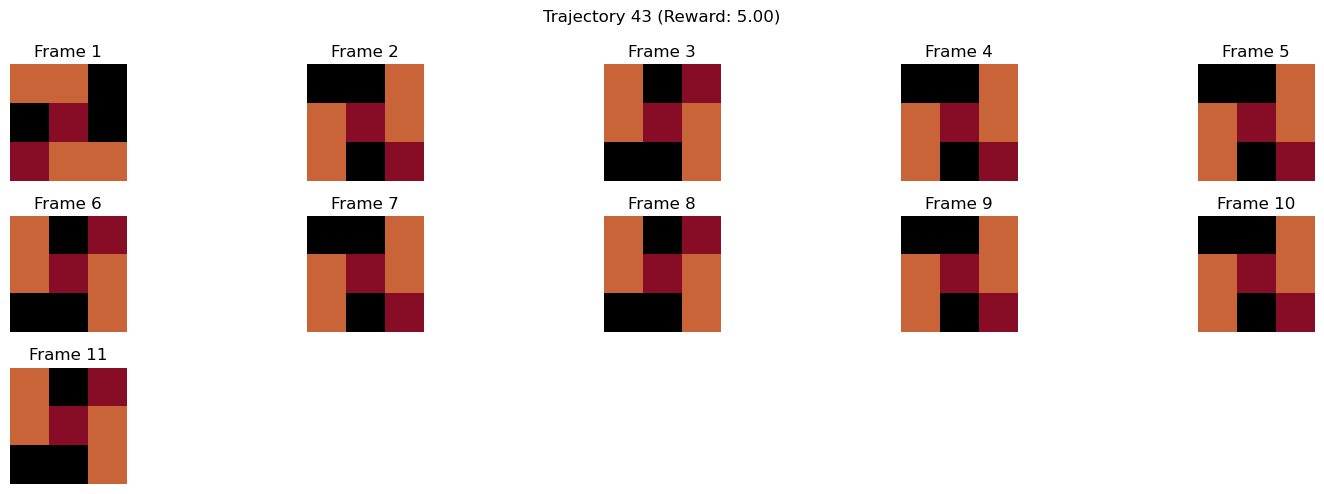

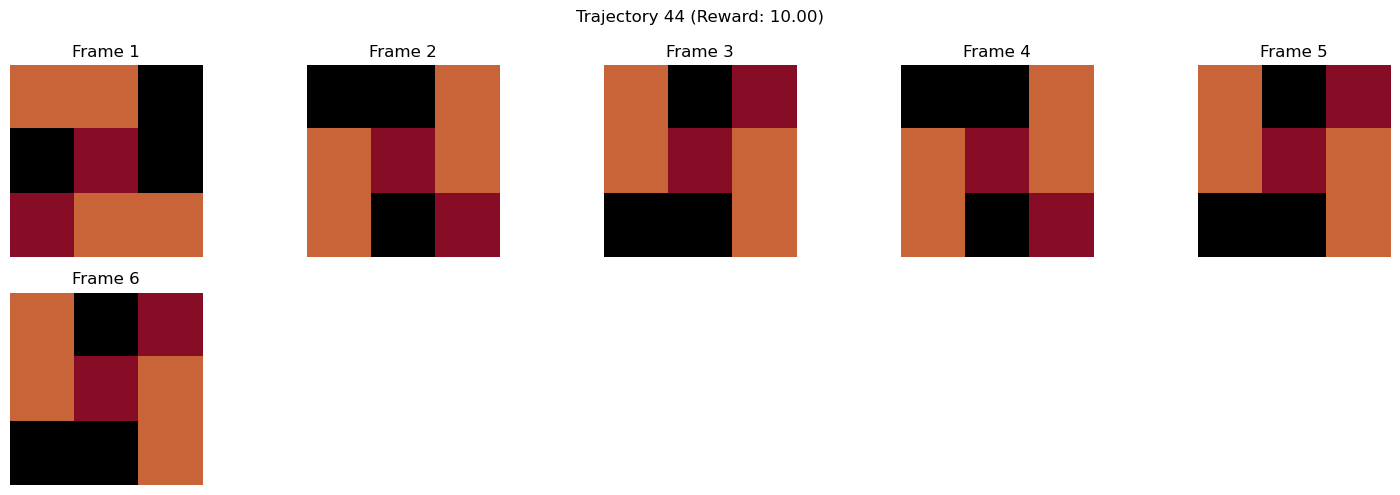

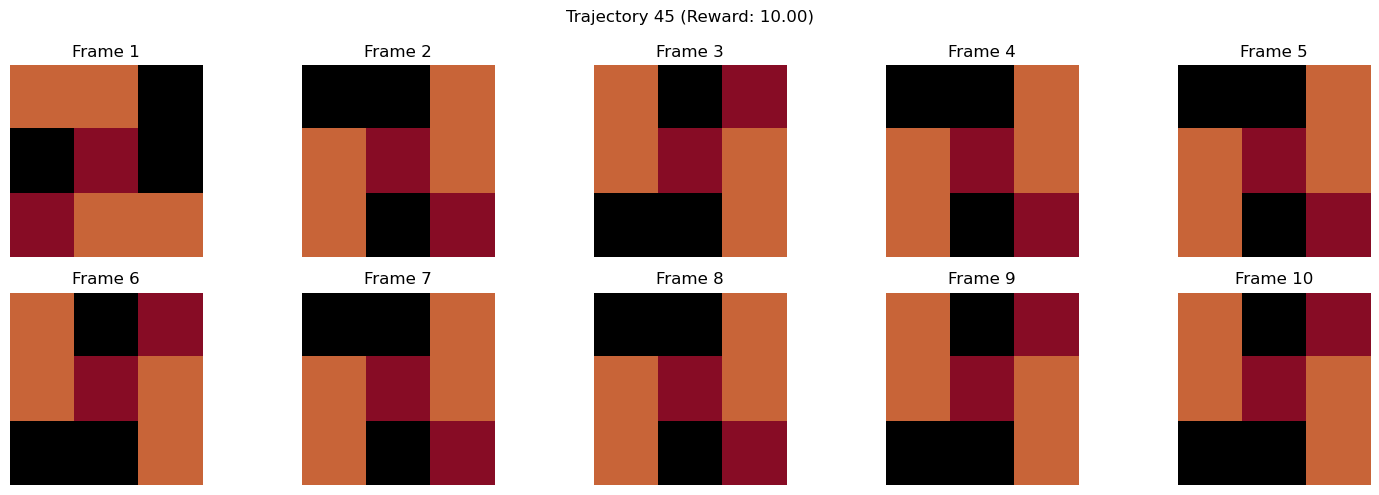

Total unique trajectories visualized: 45


In [49]:
load_and_visualize_unique('eval_samples_geometric_step_20000.json', max_display=1000)

Total trajectories: 100


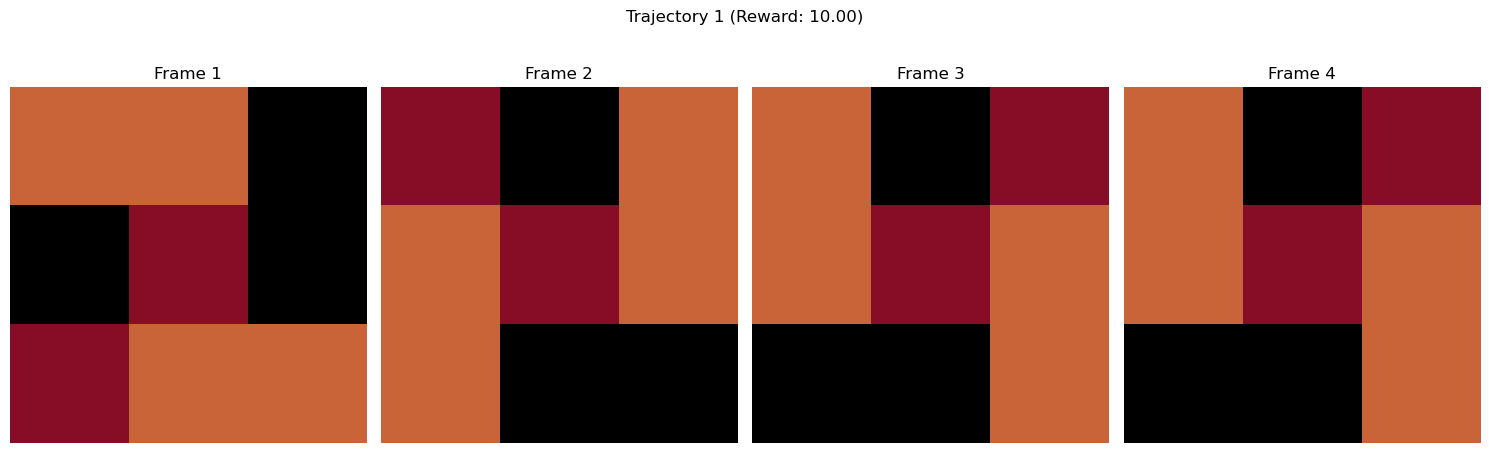

Total unique trajectories visualized: 1


In [50]:
load_and_visualize_unique('eval_samples_argmax_step_20000.json', max_display=1000)

Total trajectories: 300


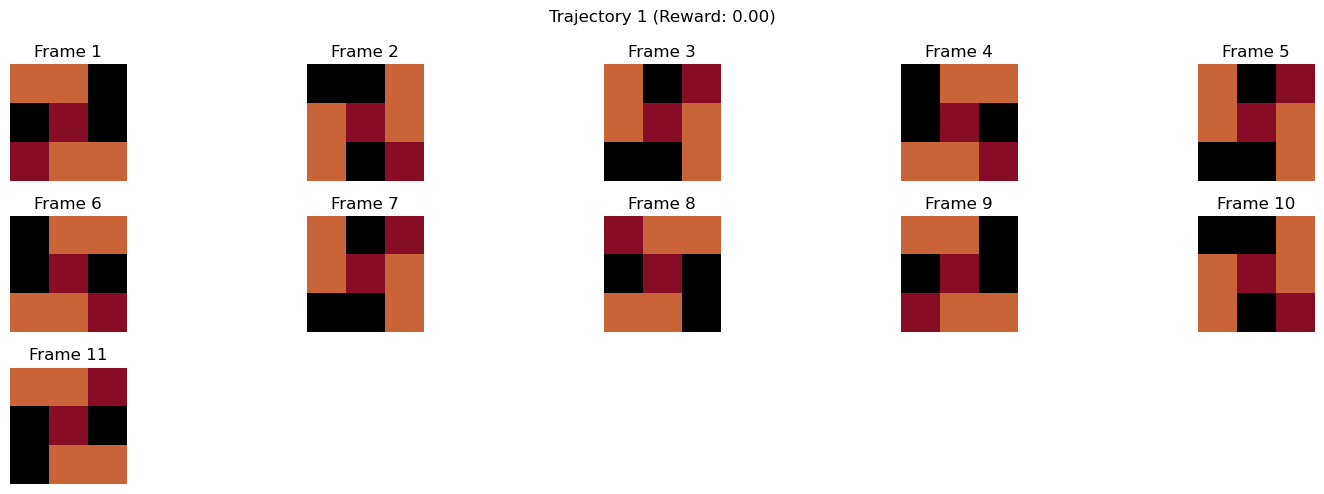

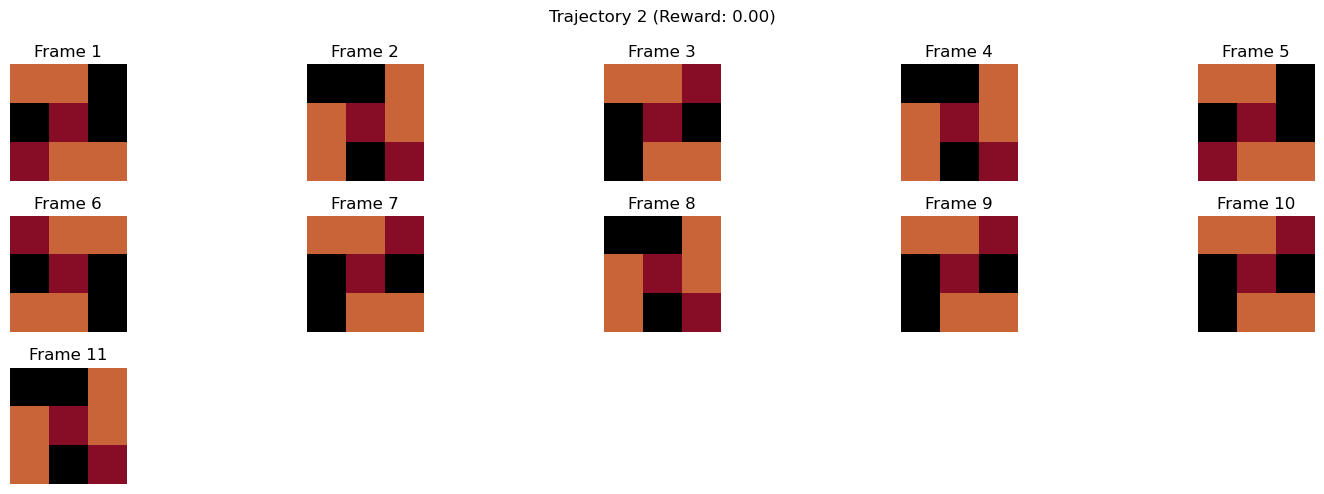

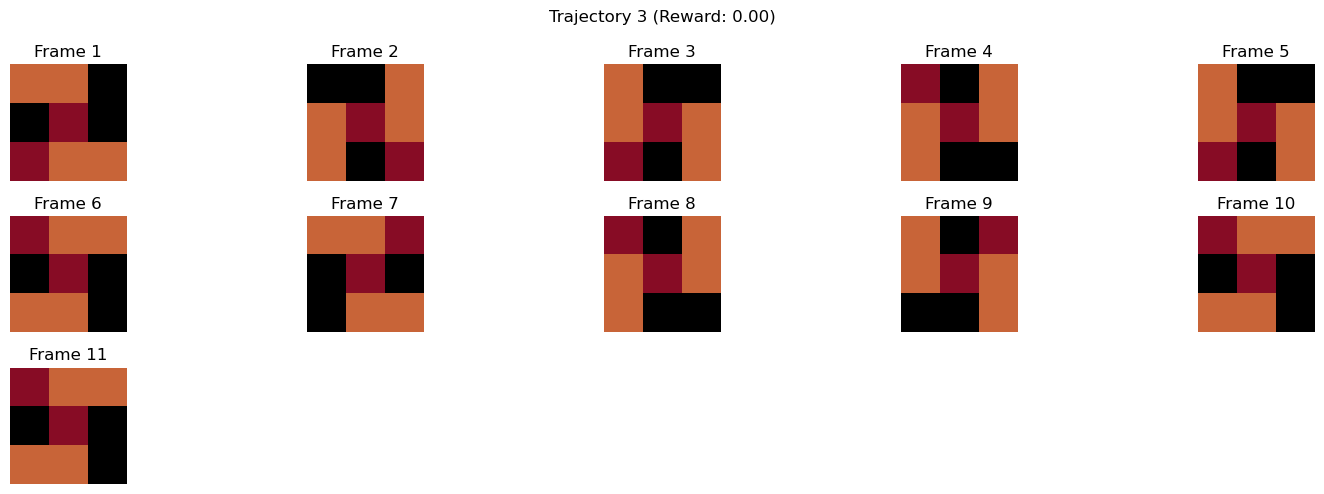

Total unique trajectories visualized: 3


In [46]:
load_and_visualize_unique('eval_samples_geometric_step_20000_local.json', max_display=1000)